In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [2]:
experiment_series ="20250509"
decay_setting = "decay"

memilio_id = 99

plot_path = f"../plots/{experiment_series}/concentration"
os.makedirs(plot_path, exist_ok=True)

In [20]:
# Load the data
result_path = f"../../preprocessing/preprocessed_data/{experiment_series}/"

df_rain = pd.read_csv(f"{result_path}/substances/{decay_setting}_Regen_{memilio_id}_output.csv")
df_rain = df_rain.loc[df_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_rain["time_in_minutes"], unit="min")

df_no_rain = pd.read_csv(f"{result_path}/substances/{decay_setting}_KeinRegen_{memilio_id}_output.csv")
df_no_rain = df_no_rain.loc[df_no_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_no_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_no_rain["time_in_minutes"], unit="min")

df_measurements = pd.read_csv(f"{result_path}/../concentration_measurements.csv")

precipitation = pd.read_csv("rain/rain.txt", decimal=",", sep=";", header=None, skiprows=1).reset_index()
precipitation.columns = ["date", "rain"]
precipitation['date'] = pd.date_range(start=start_date, periods=len(precipitation), freq="5min")


In [51]:
def visualize_precipitation_effect(manhole_name):
    df_rain_sub = df_rain[(df_rain["variable"] == "COV19") & (df_rain["manhole"]==manhole)].copy()
    df_rain_sub["location"] = df_rain_sub["manhole"].map(manhole_names)

    df_no_rain_sub = df_no_rain[(df_no_rain["variable"] == "COV19") & (df_no_rain["manhole"]==manhole)].copy()
    df_no_rain_sub["location"] = df_no_rain_sub["manhole"].map(manhole_names)

    high_rain_dates = precipitation[precipitation["rain"] > 14]["date"]

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 8), sharex=True)

    # Add vertical dashed lines to all subplots
    for ax in axes:
        for date in high_rain_dates:
            ax.axvline(x=date, color='silver', linestyle='--', linewidth=1, alpha=0.9)

    axes[0].plot(df_no_rain_sub["Date"], df_no_rain_sub["value"], color="goldenrod")
    axes[1].plot(precipitation["date"], precipitation["rain"], color="darkblue")
    axes[2].plot(df_rain_sub["Date"], df_rain_sub["value"], color="cadetblue")

    for ax in axes:
        ax.set_ylim(0)
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    axes[0].set_ylabel("COV19 [copies/l]\n(no precipitation)")
    axes[1].set_ylabel("precipitation [mm]")
    axes[2].set_ylabel("COV19 [copies/l]\n(precipitation)")

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year
    fig.suptitle(f"Effect of precipitation at {manhole_names[manhole]}")

    plt.tight_layout()
    plt.show()

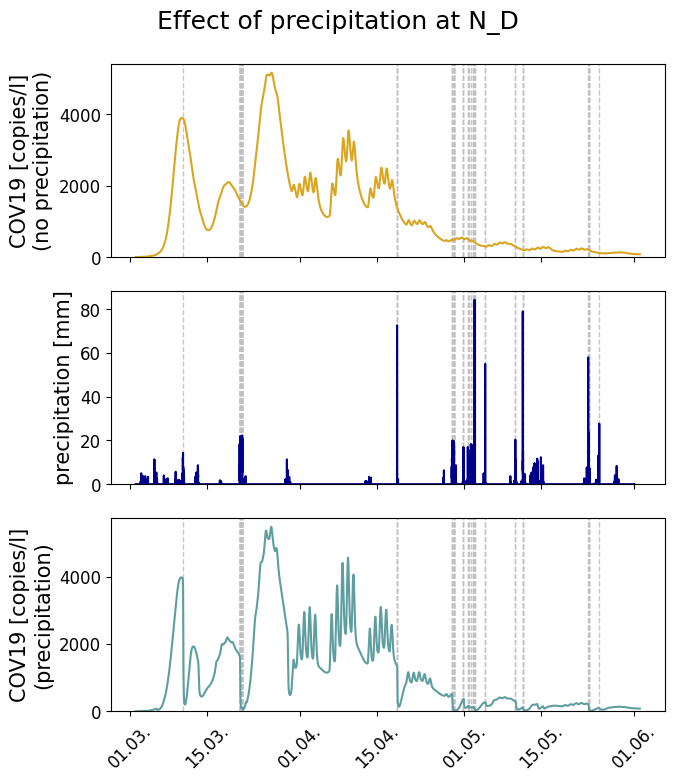

In [52]:
# N_D
manhole = "MUC562"

visualize_precipitation_effect(manhole)

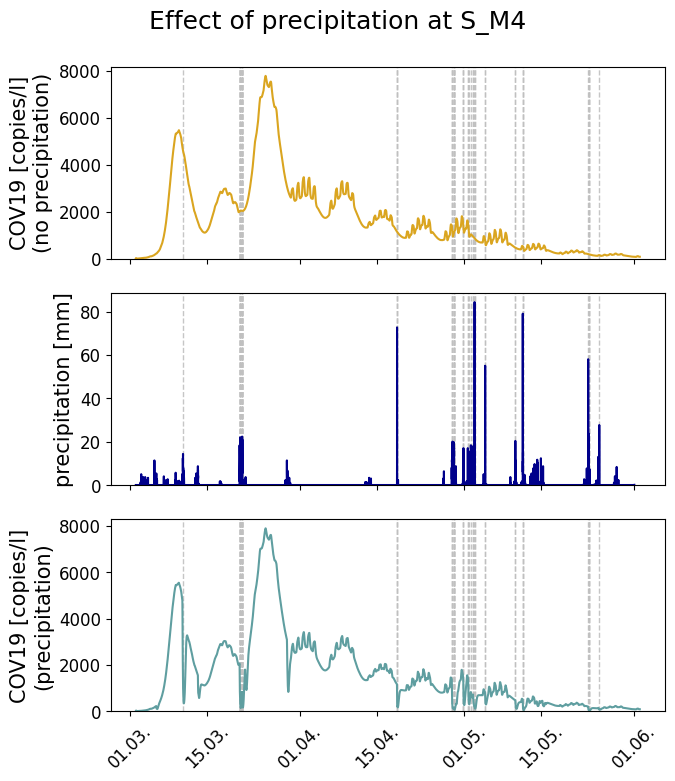

In [53]:
# S_M4
manhole = "MUC362"

visualize_precipitation_effect(manhole)